House predictions in Grokking ML, 3 chapter

In [8]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import utils
from sklearn import linear_model

In [3]:
data = pd.read_csv('Hyderabad.csv')

In [4]:
data.head(5)

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


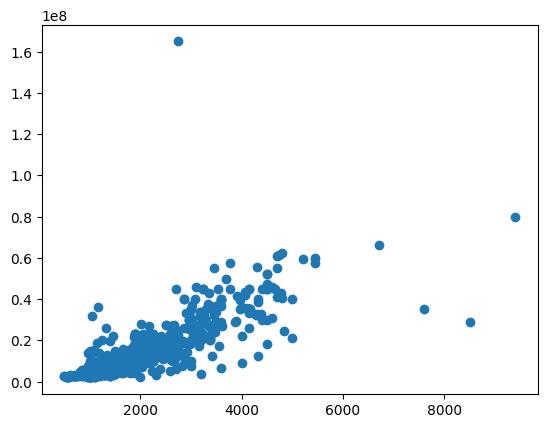

In [7]:
plt.scatter(data['Area'], data['Price'])

In [9]:
model = linear_model.LogisticRegression()

In [18]:
X = data['Area'].values.reshape(-1, 1)
y = data['Price'].values

In [19]:
model.fit(X, y)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
intercept = model.intercept_
slope = model.coef_[0]

In [41]:
slope

array([0.00059297])

In [52]:
def plot_regression_line(x, y, color='blue', linewidth=2):
    slope, intercept = np.polyfit(x, y, 1)
    x_min = np.min(x)
    x_max = np.max(x)
    x_line = np.linspace(x_min, x_max, 100)

    y_line = slope * x_line + intercept
    plt.plot(x_line, y_line, color=color, linewidth=linewidth, label='Линия регрессии')
    return slope, intercept

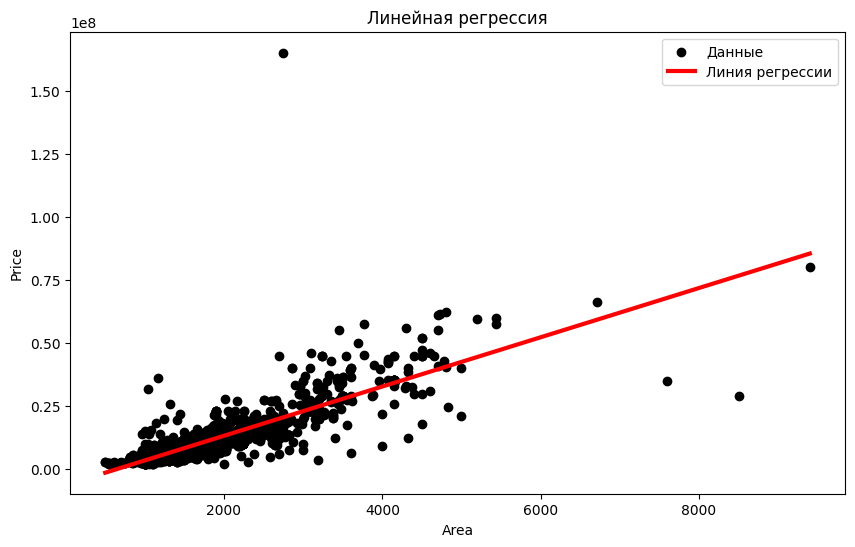

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Area'], data['Price'], color='black', label='Данные')
slope, intercept = plot_regression_line(data['Area'], data['Price'], color='red', linewidth=3)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Линейная регрессия')
plt.legend()
plt.show()